Without outlier:
Pearson's correlation: 0.954
Spearman's correlation: 0.977

With outlier:
Pearson's correlation: 0.668
Spearman's correlation: 0.865


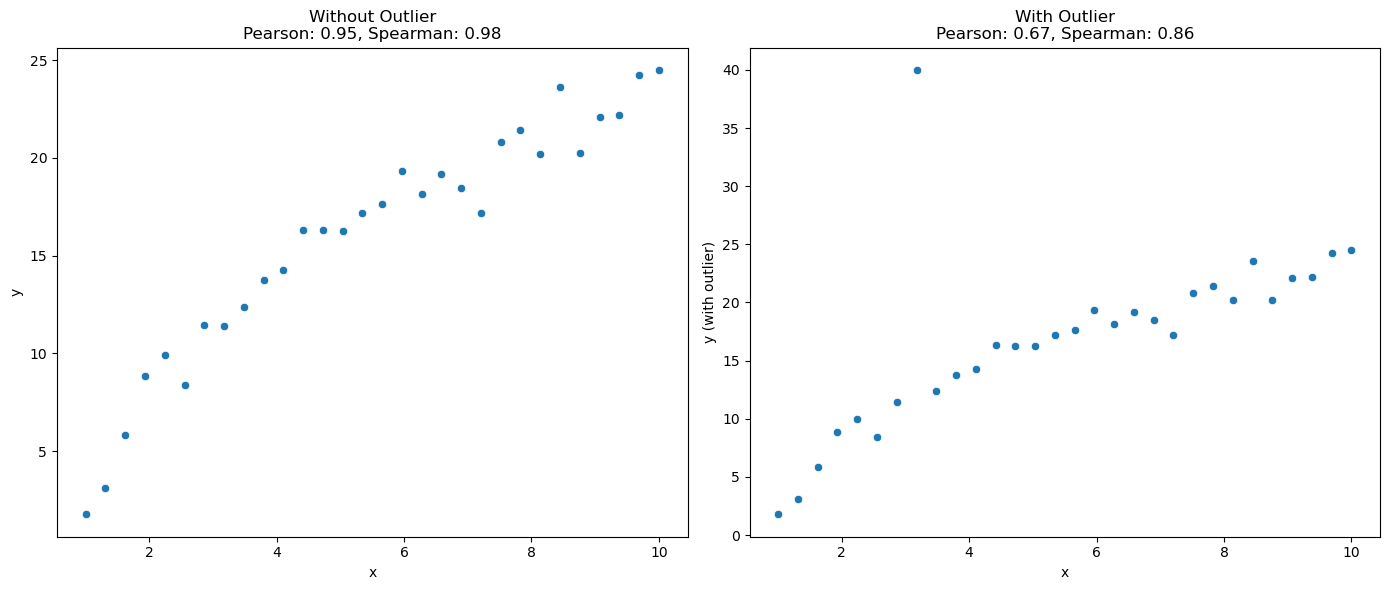

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Example data - non-linear relationship
np.random.seed(0)
x = np.linspace(1, 10, 30)
y = np.log(x) * 10 + np.random.normal(0, 1, len(x))  # non-linear relationship and noise
y_outlier = y.copy()
y_outlier[7] = 40  # add outlier

# Creating DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'y_outlier': y_outlier})

# Calculating correlations
pearson_corr = pearsonr(df['x'], df['y'])[0]
spearman_corr = spearmanr(df['x'], df['y'])[0]

pearson_corr_out = pearsonr(df['x'], df['y_outlier'])[0]
spearman_corr_out = spearmanr(df['x'], df['y_outlier'])[0]

print("Without outlier:")
print(f"Pearson's correlation: {pearson_corr:.3f}")
print(f"Spearman's correlation: {spearman_corr:.3f}")

print("\nWith outlier:")
print(f"Pearson's correlation: {pearson_corr_out:.3f}")
print(f"Spearman's correlation: {spearman_corr_out:.3f}")

# Graph
plt.figure(figsize=(14, 6))

# 1. Graph without outlier
plt.subplot(1, 2, 1)
sns.scatterplot(x='x', y='y', data=df)
plt.title(f"Without Outlier\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}")
plt.xlabel("x")
plt.ylabel("y")

# 2. Graph with outlier
plt.subplot(1, 2, 2)
sns.scatterplot(x='x', y='y_outlier', data=df)
plt.title(f"With Outlier\nPearson: {pearson_corr_out:.2f}, Spearman: {spearman_corr_out:.2f}")
plt.xlabel("x")
plt.ylabel("y (with outlier)")

plt.tight_layout()
plt.show()